Руководство компании целыми днями не знает куда себя деть. Поэтому они решили дать задание своим программистам написать программу игры "Морской бой". Но эта игра будет немного отличаться от классической. Для тех, кто не знаком с этой древней, как мир, игрой, напомню ее краткое описание.

Каждый игрок у себя на бумаге рисует игровое поле 10 х 10 клеток и расставляет на нем десять кораблей: однопалубных - 4; двухпалубных - 3; трехпалубных - 2; четырехпалубный - 1.

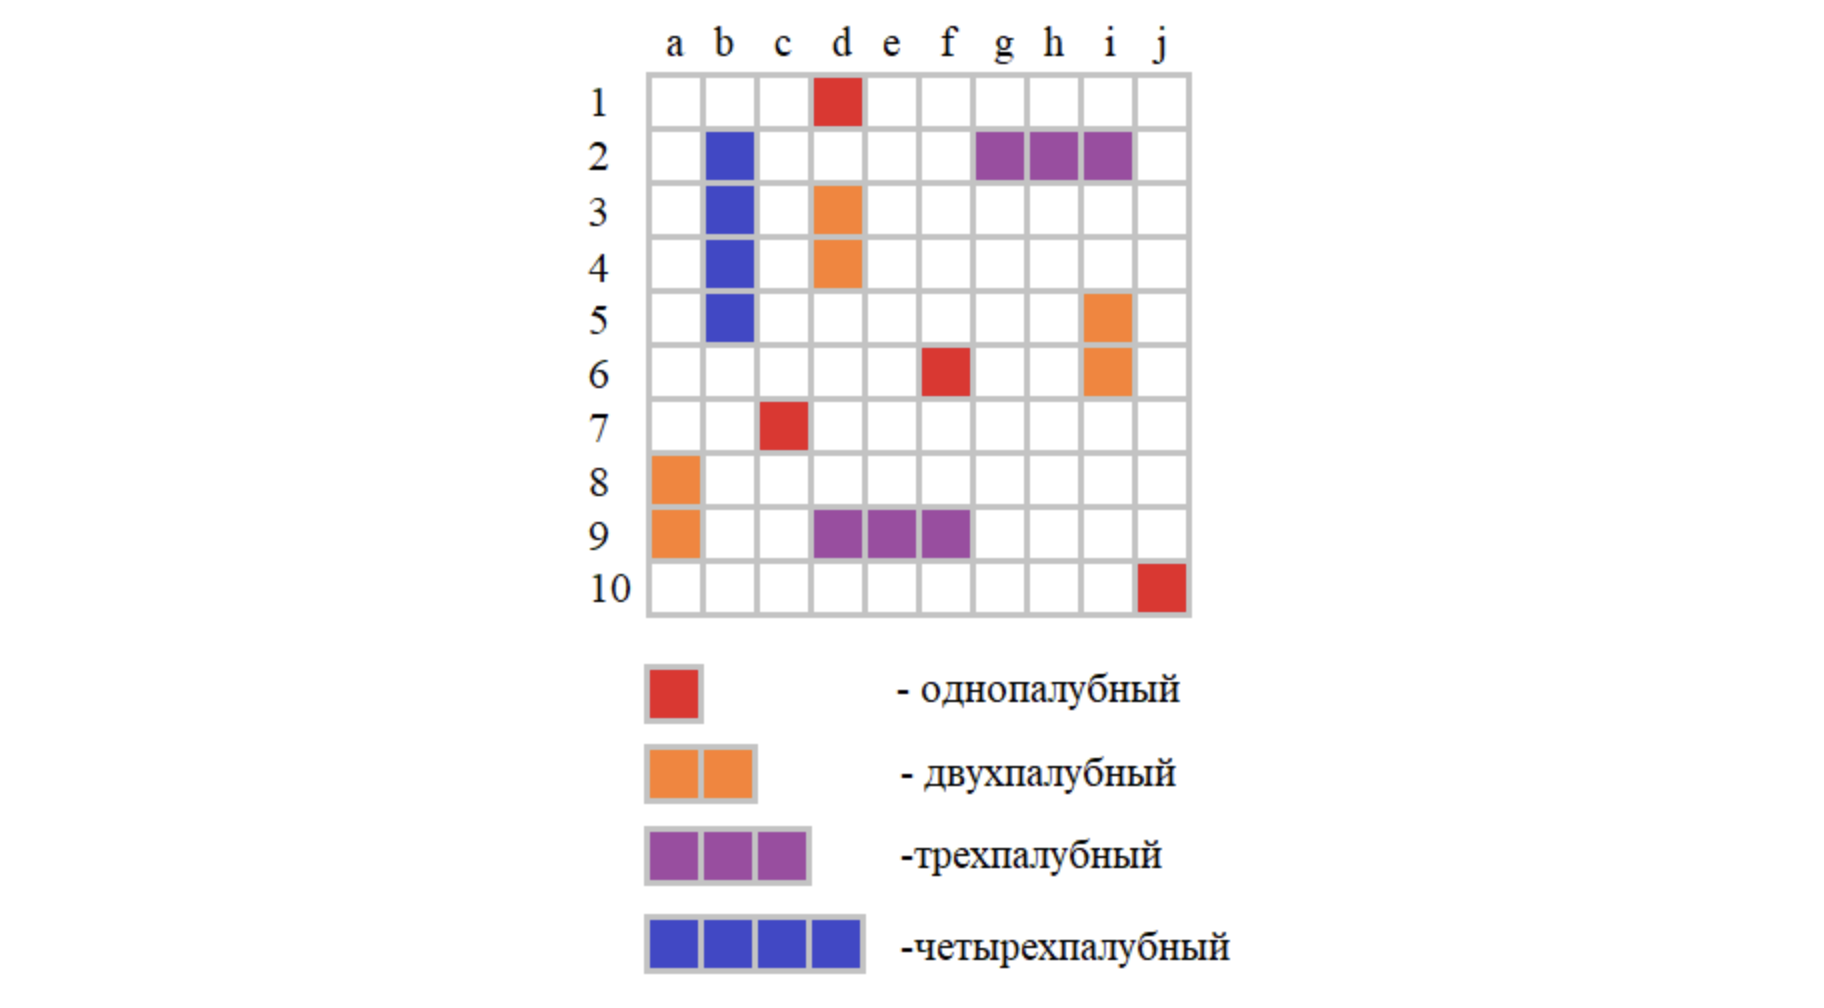

Корабли расставляются случайным образом, но так, чтобы не выходили за пределы игрового поля и не соприкасались друг с другом (в том числе и по диагонали).

Затем, игроки по очереди называют клетки, куда производят выстрелы. И отмечают эти выстрелы на другом таком же поле в 10 х 10 клеток, которое представляет поле соперника. Соперник при этом должен честно отвечать: "промах", если ни один корабль не был задет и "попал", если произошло попадание. Выигрывает тот игрок, который первым поразит все корабли соперника.

Но это была игра из глубокого прошлого. Теперь же, в компьютерную эру, корабли на игровом поле могут перемещаться в направлении своей ориентации на одну клетку после каждого хода соперника, если в них не было ни одного попадания.

Итак, лично вам поручается сделать важный фрагмент этой игры - расстановку и управление кораблями в этой игре. А само задание звучит так.

# Техническое задание

В программе необходимо объявить два класса:

Ship - для представления кораблей;

GamePole - для описания игрового поля.

## Класс Ship

Класс Ship должен описывать корабли набором следующих параметров:

x, y - координаты начала расположения корабля (целые числа);

length - длина корабля (число палуб: целое значение: 1, 2, 3 или 4);

tp - ориентация корабля (1 - горизонтальная; 2 - вертикальная).

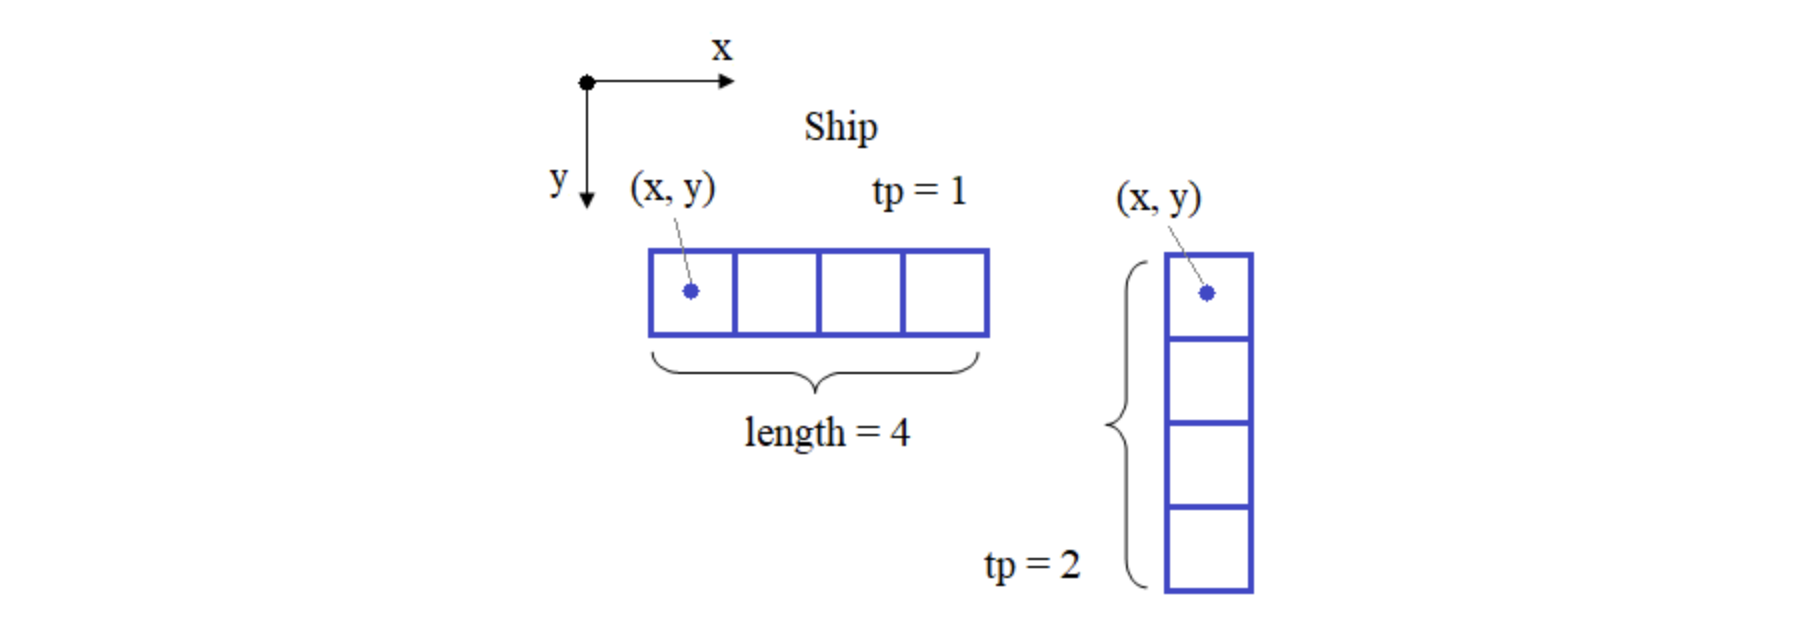

Объекты класса Ship должны создаваться командами:
```Py
ship = Ship(length)
ship = Ship(length, tp)
ship = Ship(length, tp, x, y)
```
По умолчанию (если не указывается) параметр tp = 1, а координаты x, y равны None.

В каждом объекте класса Ship должны формироваться следующие локальные атрибуты:

_x, _y - координаты корабля (целые значения в диапазоне [0; size), где size - размер игрового поля);

_length - длина корабля (число палуб);

_tp - ориентация корабля;

_is_move - возможно ли перемещение корабля (изначально равно True);

_cells - изначально список длиной length, состоящий из единиц (например, при length=3, _cells = [1, 1, 1]).

Список _cells будет сигнализировать о попадании соперником в какую-либо палубу корабля. Если стоит 1, то попадания не было, а если стоит значение 2, то произошло попадание в соответствующую палубу.

При попадании в корабль (хотя бы одну его палубу), флаг _is_move устанавливается в False и перемещение корабля по игровому полю прекращается.

В самом классе Ship должны быть реализованы следующие методы (конечно, возможны и другие, дополнительные):

set_start_coords(x, y) - установка начальных координат (запись значений в локальные атрибуты _x, _y);

get_start_coords() - получение начальных координат корабля в виде кортежа x, y;

move(go) - перемещение корабля в направлении его ориентации на go клеток (go = 1 - движение в одну сторону на клетку; go = -1 - движение в другую сторону на одну клетку); движение возможно только если флаг _is_move = True;

is_collide(ship) - проверка на столкновение с другим кораблем ship (столкновением считается, если другой корабль или пересекается с текущим или просто соприкасается, в том числе и по диагонали); метод возвращает True, если столкновение есть и False - в противном случае;

is_out_pole(size) - проверка на выход корабля за пределы игрового поля (size - размер игрового поля, обычно, size = 10); возвращается булево значение True, если корабль вышел из игрового поля и False - в противном случае;

С помощью магических методов ```__getitem__()``` и ```__setitem__()``` обеспечить доступ к коллекции _cells следующим образом:
```Py
value = ship[indx] # считывание значения из _cells по индексу indx (индекс отсчитывается от 0)
ship[indx] = value # запись нового значения в коллекцию _cells
```

## Класс GamePole

Следующий класс GamePole должен обеспечивать работу с игровым полем. Объекты этого класса создаются командой:
```Py
pole = GamePole(size)
```
где size - размеры игрового поля (обычно, size = 10).

В каждом объекте этого класса должны формироваться локальные атрибуты:

_size - размер игрового поля (целое положительное число);

_ships - список из кораблей (объектов класса Ship); изначально пустой список.

В самом классе GamePole должны быть реализованы следующие методы (возможны и другие, дополнительные методы):

init() - начальная инициализация игрового поля; здесь создается список из кораблей (объектов класса Ship): однопалубных - 4; двухпалубных - 3; трехпалубных - 2; четырехпалубный - 1 (ориентация этих кораблей должна быть случайной).

Корабли формируются в коллекции _ships следующим образом: однопалубных - 4; двухпалубных - 3; трехпалубных - 2; четырехпалубный - 1. Ориентация этих кораблей должна быть случайной. Для этого можно воспользоваться функцией randint следующим образом:
```Py
[Ship(4, tp=randint(1, 2)), Ship(3, tp=randint(1, 2)), Ship(3, tp=randint(1, 2)), ...]
```
Начальные координаты x, y не расставленных кораблей равны None.

После этого, выполняется их расстановка на игровом поле со случайными координатами так, чтобы корабли не пересекались между собой.

get_ships() - возвращает коллекцию _ships;

move_ships() - перемещает каждый корабль из коллекции _ships на одну клетку (случайным образом вперед или назад) в направлении ориентации корабля; если перемещение в выбранную сторону невозможно (другой корабль или пределы игрового поля), то попытаться переместиться в противоположную сторону, иначе (если перемещения невозможны), оставаться на месте;

show() - отображение игрового поля в консоли (корабли должны отображаться значениями из коллекции _cells каждого корабля, вода - значением 0);

get_pole() - получение текущего игрового поля в виде двумерного (вложенного) кортежа размерами size x size элементов.

Пример отображения игрового поля:

```Py
0 0 1 0 1 1 1 0 0 0
1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 1
0 0 0 0 1 0 1 0 0 1
0 0 0 0 0 0 1 0 0 0
1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0
0 1 1 1 1 0 0 0 0 0
0 0 0 0 0 0 0 1 1 0
```

Пример использования классов (эти строчки в программе не писать):
```Py
SIZE_GAME_POLE = 10

pole = GamePole(SIZE_GAME_POLE)
pole.init()
pole.show()

pole.move_ships()
print()
pole.show()
```

В программе требуется только объявить классы Ship и GamePole с соответствующим функционалом. На экран выводить ничего не нужно.

P.S. Для самых преданных поклонников программирования и ООП. Завершите эту программу, добавив еще один класс SeaBattle для управления игровым процессом в целом. Игра должна осуществляться между человеком и компьютером. Выстрелы со стороны компьютера можно реализовать случайным образом в свободные клетки. Сыграйте в эту игру и выиграйте у компьютера.

# Tests

In [5]:
import random

class Ship:
    def __init__(self, length, tp=1, x=None, y=None):
        self._length = length
        self._tp = tp
        self._x = x
        self._y = y
        self._is_move = True
        self._cells = [1] * length

    def set_start_coords(self, x, y):
        self._x = x
        self._y = y

    def get_start_coords(self):
        return self._x, self._y

    def move(self, go):
        if self._is_move:
            if self._tp == 1:  # Горизонтальная ориентация
                self._x += go
            else:  # Вертикальная ориентация
                self._y += go

    def is_collide(self, ship):
        for i in range(self._length):
            for j in range(ship._length):
                dx = (self._x + i if self._tp == 1 else self._x) - (ship._x + j if ship._tp == 1 else ship._x)
                dy = (self._y + i if self._tp == 2 else self._y) - (ship._y + j if ship._tp == 2 else ship._y)
                if abs(dx) <= 1 and abs(dy) <= 1:
                    return True
        return False

    def is_out_pole(self, size):
        if self._tp == 1:
            return not (0 <= self._x < size and 0 <= self._y < size and self._x + self._length - 1 < size)
        else:
            return not (0 <= self._x < size and 0 <= self._y < size and self._y + self._length - 1 < size)

    def __getitem__(self, indx):
        return self._cells[indx]

    def __setitem__(self, indx, value):
        self._cells[indx] = value
        if value == 2:
            self._is_move = False


class GamePole:
    def __init__(self, size):
        self._size = size
        self._ships = []

    def init(self):
        ship_sizes = [4, 3, 3, 2, 2, 1, 1, 1, 1]
        for size in ship_sizes:
            ship = Ship(size, tp=random.randint(1, 2))
            placed = False
            while not placed:
                x, y = random.randint(0, self._size - 1), random.randint(0, self._size - 1)
                ship.set_start_coords(x, y)
                if self._can_place(ship):
                    placed = True
                    self._ships.append(ship)

    def _can_place(self, ship):
        for other_ship in self._ships:
            if ship.is_collide(other_ship) or ship.is_out_pole(self._size):
                return False
        return True

    def get_ships(self):
        return self._ships

    def move_ships(self):
        for ship in self._ships:
            direction = random.choice([-1, 1])
            # Попытка переместить корабль в выбранном направлении
            ship.move(direction)
            # Проверка, вышел ли корабль за пределы поля или столкнулся с другим кораблем после перемещения
            if ship.is_out_pole(self._size) or any(ship.is_collide(other) for other in self._ships if other != ship):
                # Если да, пытаемся вернуть корабль обратно
                ship.move(-direction)
                # Повторная проверка после возврата. Если корабль все еще вне поля или столкнулся, оставляем его на месте.
                if ship.is_out_pole(self._size) or any(ship.is_collide(other) for other in self._ships if other != ship):
                    # Возвращаем корабль в исходное положение, если он все еще нарушает правила
                    ship.move(direction)

    def show(self):
        pole = [[0 for _ in range(self._size)] for _ in range(self._size)]
        for ship in self._ships:
            x, y = ship.get_start_coords()
            for i in range(ship._length):
                if ship._tp == 1:
                    pole[y][x + i] = ship[i]
                else:
                    pole[y + i][x] = ship[i]
        for row in pole:
            print(' '.join(str(cell) for cell in row))

    def get_pole(self):
        pole = [[0 for _ in range(self._size)] for _ in range(self._size)]
        for ship in self._ships:
            x, y = ship.get_start_coords()
            for i in range(ship._length):
                if ship._tp == 1:
                    pole[y][x + i] = ship[i]
                else:
                    pole[y + i][x] = ship[i]
        return tuple(tuple(row) for row in pole)

# Tests
SIZE_GAME_POLE = 10

pole = GamePole(SIZE_GAME_POLE)
pole.init()
pole.show()

pole.move_ships()
print()
pole.show()
ship = Ship(2)
ship = Ship(2, 1)
ship = Ship(3, 2, 0, 0)
assert ship._length == 3 and ship._tp == 2 and ship._x == 0 and ship._y == 0, "неверные значения атрибутов объекта класса Ship"
assert ship._cells == [1, 1, 1], "неверный список _cells"
assert ship._is_move, "неверное значение атрибута _is_move"
ship.set_start_coords(1, 2)
assert ship._x == 1 and ship._y == 2, "неверно отработал метод set_start_coords()"
assert ship.get_start_coords() == (1, 2), "неверно отработал метод get_start_coords()"
ship.move(1)
s1 = Ship(4, 1, 0, 0)
s2 = Ship(3, 2, 0, 0)
s3 = Ship(3, 2, 0, 2)
assert s1.is_collide(s2), "неверно работает метод is_collide() для кораблей Ship(4, 1, 0, 0) и Ship(3, 2, 0, 0)"
assert s1.is_collide(
    s3) == False, "неверно работает метод is_collide() для кораблей Ship(4, 1, 0, 0) и Ship(3, 2, 0, 2)"
s2 = Ship(3, 2, 1, 1)
assert s1.is_collide(s2), "неверно работает метод is_collide() для кораблей Ship(4, 1, 0, 0) и Ship(3, 2, 1, 1)"
s2 = Ship(3, 1, 8, 1)
assert s2.is_out_pole(10), "неверно работает метод is_out_pole() для корабля Ship(3, 1, 8, 1)"
s2 = Ship(3, 2, 1, 5)
assert s2.is_out_pole(10) == False, "неверно работает метод is_out_pole(10) для корабля Ship(3, 2, 1, 5)"
s2[0] = 2
assert s2[0] == 2, "неверно работает обращение ship[indx]"
p = GamePole(10)
p.init()
for nn in range(5):
    for s in p._ships:
        assert s.is_out_pole(10) == False, "корабли выходят за пределы игрового поля"
        for ship in p.get_ships():
            if s != ship:
                assert s.is_collide(ship) == False, "корабли на игровом поле соприкасаются"
    p.move_ships()

gp = p.get_pole()
assert type(gp) == tuple and type(gp[0]) == tuple, "метод get_pole должен возвращать двумерный кортеж"
assert len(gp) == 10 and len(gp[0]) == 10, "неверные размеры игрового поля, которое вернул метод get_pole"
pole_size_8 = GamePole(8)
pole_size_8.init()
print("\n Passed")

0 0 0 0 0 0 0 0 0 0
0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0
0 1 1 1 1 0 1 1 1 0
0 0 0 0 0 0 0 0 0 0
0 1 0 0 1 0 0 1 0 0
0 1 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 1 0 1
0 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0

0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0
0 1 1 1 1 0 1 1 1 0
0 0 0 0 0 0 0 0 0 0
0 1 0 0 0 1 0 1 0 0
0 1 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 1 0 1
0 0 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0

 Passed
